In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mri-and-alzheimers/oasis_cross-sectional.csv
/kaggle/input/mri-and-alzheimers/oasis_longitudinal.csv


In [2]:
home_cross_sectional = pd.read_csv('/kaggle/input/mri-and-alzheimers/oasis_cross-sectional.csv')

# home_longitudinal = pd.read_csv('/kaggle/input/mri-and-alzheimers/oasis_longitudinal.csv')

# Cross Sectional Analysis

In [3]:
home_cross_sectional.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


# Information About Data

In [4]:
# 'ID' : Id of poeple (Unique)
# 'M/F' : Gender
# 'Hand' : Hand that the person uses frequently -> 'All R'
# 'Age' : Age of the person (18-96)
# 'Educ' : Education Level [1 (poor) to 5 (excellent)]
# 'SES' : Socioeconomic Status [1 (highest status) to 5 (lowest status)]
# 'MMSE' : Mini Mental State Examination [(range is from 0 = worst to 30 = best)]
# 'CDR' : Clinical Dementia Rating [(0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)]
# 'eTIV' : Estimated Total Intracranial Volume
# 'nWBV' : Normalize Whole Brain Volume
# 'ASF' : Atlas Scaling Factor
# 'Delay' : to the number of days between two medical visits.

#--------------------------------------------------------------------------------------------------------------#

# 1. SES

# People gives rating from 1 to 5
# And there are lots of Null values

# 2. MMSE

# MMSE values lies between = 14-30 
# Consists of Null values
# When a person has trouble remembering, learning new things is termed as Cognitive impairment, and MMSE is a test to measure it.

# 3. CDR

# It measures the symptomes of Dementia 
# Dementia is not a single disease in itself, but a general term to describe symptoms of 
# impairment in memory, communication, and thinking.

# Composite Rating	Symptoms
# 0	none
# 0.5	very mild
# 1	mild
# 2	moderate
# 3	severe

# Here, the rating is between 0-2

# 4. eTIV

# 1123-1992
# It is the volumn of that person's internal skull

# 5. nWBV

# It is the volumn of whole brain
# 0.64-0.89 = measures in 0-1

# 6. ASF

# Indicating the relation of size between the image and atlas

# Visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'ASF')

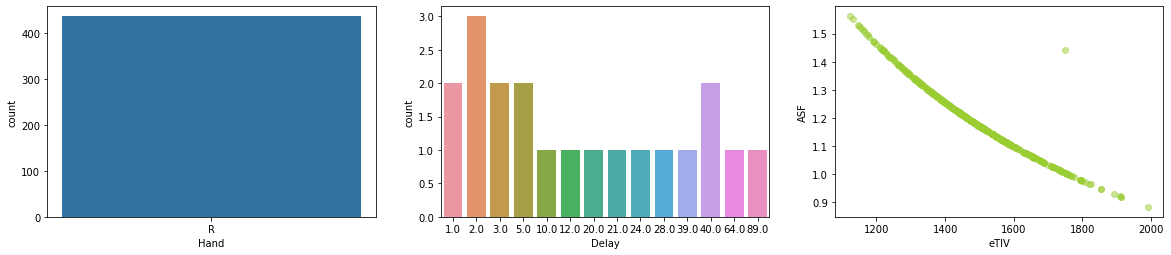

In [6]:
figure = plt.figure(figsize=(20,55))

figure.add_subplot(12,3,1)
sns.countplot(x='Hand',data=home_cross_sectional)

figure.add_subplot(12,3,2)
sns.countplot(x='Delay',data=home_cross_sectional)

figure.add_subplot(12,3,3)
plt.scatter(x=home_cross_sectional['eTIV'], y=home_cross_sectional['ASF'], color=('yellowgreen'), alpha=0.5)
plt.xlabel('eTIV')
plt.ylabel('ASF')

## Deleting Non-related Features

In [7]:
# We remove 'Hand' because all of them have same prior hand i.e. 'R' Hand
# We remove 'Delay' because 416 NaN values are there
# We remove 'ASF' because between 'eTIV' and 'ASF' there is linear relation, so you can say that 'ASF' is another form of 'eTIV', i.e. we can find out 'ASF', if 'eTIV' is given.

non_related_features = ['ID', 'Hand', 'Delay', 'ASF']

In [8]:
home_cross_sectional.drop(non_related_features, axis=1, inplace =True)

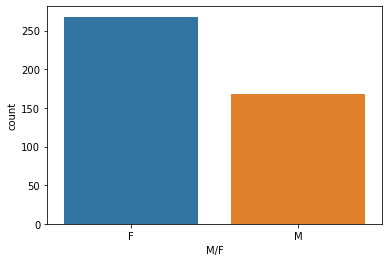

In [9]:
sns.countplot(x='M/F',data=home_cross_sectional)

## Working on Missing Values (Educ, SES, MMSE, Delay)
The 201 missing values of 'CDR' rows will be used for testing! 

In [10]:
missing_val_count_by_column = (home_cross_sectional.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Educ    201
SES     220
MMSE    201
CDR     201
dtype: int64


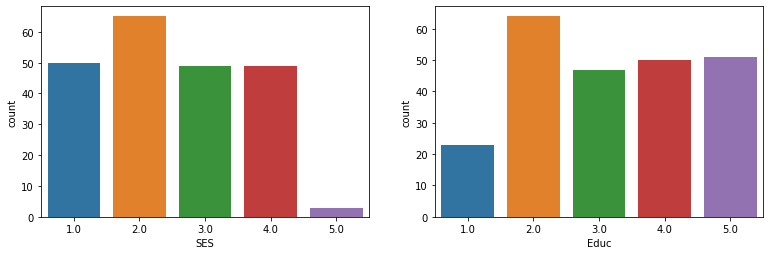

In [11]:
figure = plt.figure(figsize=(20,55))

figure.add_subplot(12,3,1)
sns.countplot(x='SES',data=home_cross_sectional)
# 'SES' : Socioeconomic Status [1 (highest status) to 5 (lowest status)]

figure.add_subplot(12,3,2)
sns.countplot(x='Educ',data=home_cross_sectional)
# 'Educ' : Educational Level [1 (poor) to 5 (excellent)]

In [12]:
home_cross_sectional['SES'].replace(np.NaN, home_cross_sectional['SES'].mean(), inplace = True)
home_cross_sectional['Educ'].replace(np.NaN, home_cross_sectional['Educ'].median(), inplace = True)

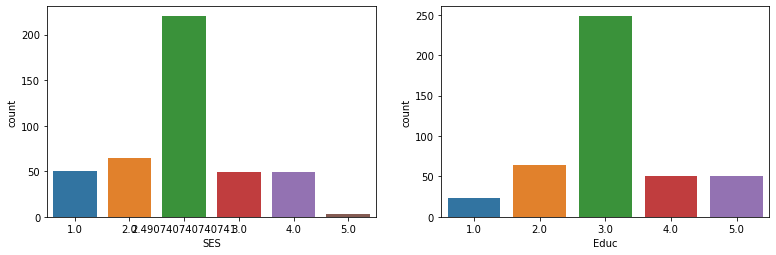

In [13]:
figure = plt.figure(figsize=(20,55))

figure.add_subplot(12,3,1)
sns.countplot(x='SES',data=home_cross_sectional)
# 'SES' : Socioeconomic Status [1 (highest status) to 5 (lowest status)]

figure.add_subplot(12,3,2)
sns.countplot(x='Educ',data=home_cross_sectional)
# 'Educ' : Educational Level [1 (poor) to 5 (excellent)]

In [14]:
missing_val_count_by_column = (home_cross_sectional.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

MMSE    201
CDR     201
dtype: int64


## Handling the missing values of 'MMSE' column
'MMSE' : Mini Mental State Examination [(range is from 0 = worst to 30 = best)]

Text(0, 0.5, 'nWBV')

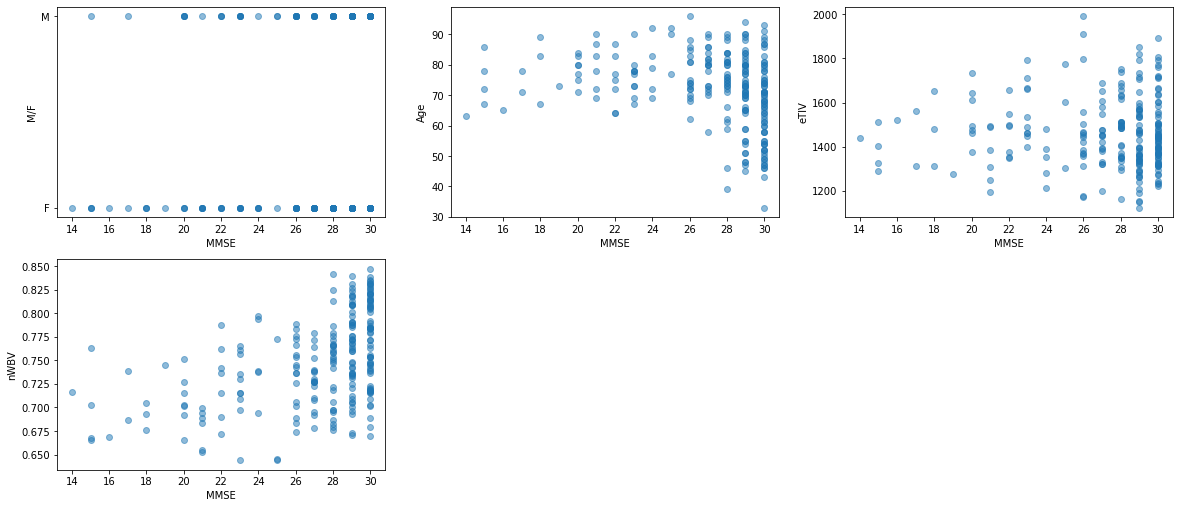

In [15]:
figure = plt.figure(figsize=(20,55))
# MMSE = (range is from 0 = worst to 30 = best)

figure.add_subplot(12,3,1)
plt.scatter(x=home_cross_sectional['MMSE'], y=home_cross_sectional['M/F'], alpha=0.5)
plt.xlabel('MMSE')
plt.ylabel('M/F')
# Gender

figure.add_subplot(12,3,2)
plt.scatter(x=home_cross_sectional['MMSE'], y=home_cross_sectional['Age'], alpha=0.5)
plt.xlabel('MMSE')
plt.ylabel('Age')

figure.add_subplot(12,3,3)
plt.scatter(x=home_cross_sectional['MMSE'], y=home_cross_sectional['eTIV'], alpha=0.5)
plt.xlabel('MMSE')
plt.ylabel('eTIV')
# 'eTIV' : Estimated Total Intracranial Volume

figure.add_subplot(12,3,4)
plt.scatter(x=home_cross_sectional['MMSE'], y=home_cross_sectional['nWBV'], alpha=0.5)
plt.xlabel('MMSE')
plt.ylabel('nWBV')
# 'nWBV' : Normalize Whole Brain Volume



In [16]:
# using dummy values

home_cross_sectional = pd.get_dummies(home_cross_sectional)
home_cross_sectional.drop(['M/F_F'], axis=1, inplace=True)
home_cross_sectional.head()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,M/F_M
0,74,2.0,3.000000,29.0,0.0,1344,0.743,0
1,55,4.0,1.000000,29.0,0.0,1147,0.810,0
2,73,4.0,3.000000,27.0,0.5,1454,0.708,0
3,28,3.0,2.490741,NaN,NaN,1588,0.803,1
4,18,3.0,2.490741,NaN,NaN,1737,0.848,1


In [17]:
# Predict 'MMSE' with KNN Algo

features_for_MMSE = ['M/F_M', 'Age', 'eTIV', 'nWBV', 'MMSE']
data_for_MMSE_analysis = home_cross_sectional[features_for_MMSE]
data_for_MMSE_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F_M   436 non-null    uint8  
 1   Age     436 non-null    int64  
 2   eTIV    436 non-null    int64  
 3   nWBV    436 non-null    float64
 4   MMSE    235 non-null    float64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 14.2 KB


In [18]:
train_data_for_MMSE = data_for_MMSE_analysis[data_for_MMSE_analysis['MMSE'].notnull()]
null_columns_for_MMSE = data_for_MMSE_analysis[data_for_MMSE_analysis['MMSE'].isnull()]
null_columns_for_MMSE.drop(['MMSE'], axis=1, inplace=True)

y = train_data_for_MMSE['MMSE']
X = train_data_for_MMSE.drop(['MMSE'], axis=1)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
missing_val_count_by_column = (train_data_for_MMSE.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

missing_val_count_by_column = (null_columns_for_MMSE.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)
Series([], dtype: int64)


In [20]:
n_neighbors = 1
from sklearn.neighbors import KNeighborsClassifier

model_for_MMSE = KNeighborsClassifier(n_neighbors = n_neighbors)
model_for_MMSE.fit(X, y)

final_result = model_for_MMSE.predict(null_columns_for_MMSE)

In [21]:
home_cross_sectional.head()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,M/F_M
0,74,2.0,3.000000,29.0,0.0,1344,0.743,0
1,55,4.0,1.000000,29.0,0.0,1147,0.810,0
2,73,4.0,3.000000,27.0,0.5,1454,0.708,0
3,28,3.0,2.490741,NaN,NaN,1588,0.803,1
4,18,3.0,2.490741,NaN,NaN,1737,0.848,1


In [22]:
MMSE_columns_with_nulls = home_cross_sectional['MMSE'].isnull()
count = 0
for index, value in enumerate(MMSE_columns_with_nulls):
    if value:
        home_cross_sectional.at[index, 'MMSE'] = final_result[count]
        count+=1

In [23]:
missing_val_count_by_column = (home_cross_sectional.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

CDR    201
dtype: int64


# Train test split

In [24]:
home_cross_sectional.head()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,M/F_M
0,74,2.0,3.000000,29.0,0.0,1344,0.743,0
1,55,4.0,1.000000,29.0,0.0,1147,0.810,0
2,73,4.0,3.000000,27.0,0.5,1454,0.708,0
3,28,3.0,2.490741,30.0,NaN,1588,0.803,1
4,18,3.0,2.490741,30.0,NaN,1737,0.848,1


In [25]:
train_data = home_cross_sectional[home_cross_sectional['CDR'].notnull()]

test_data = home_cross_sectional[home_cross_sectional['CDR'].isnull()]
test_data.drop(['CDR'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
y = train_data['CDR']
X = train_data.drop(['CDR'], axis=1)

In [27]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [28]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 229 to 304
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     211 non-null    int64  
 1   Educ    211 non-null    float64
 2   SES     211 non-null    float64
 3   MMSE    211 non-null    float64
 4   eTIV    211 non-null    int64  
 5   nWBV    211 non-null    float64
 6   M/F_M   211 non-null    uint8  
dtypes: float64(4), int64(2), uint8(1)
memory usage: 11.7 KB


In [29]:
val_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 399 to 182
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     24 non-null     int64  
 1   Educ    24 non-null     float64
 2   SES     24 non-null     float64
 3   MMSE    24 non-null     float64
 4   eTIV    24 non-null     int64  
 5   nWBV    24 non-null     float64
 6   M/F_M   24 non-null     uint8  
dtypes: float64(4), int64(2), uint8(1)
memory usage: 1.3 KB


# Model

In [30]:
models = {}

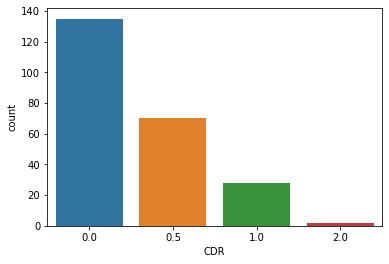

In [31]:
sns.countplot(x='CDR',data=home_cross_sectional)

In [32]:
def related_pred(predictions):
    base_score = [0, 0.5, 1, 2]
    final_pred_list = []
    for each_value in predictions:
        abs_values = []
        for i in range(len(base_score)):
            abs_values.append(abs(base_score[i]-each_value))
        minimum = min(abs_values)
        for _ in range(len(abs_values)):
            if abs_values[_] == minimum:
                index = _
        final_pred_list.append(base_score[index])
    return np.array(final_pred_list)

In [33]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

model_1 = RandomForestRegressor(n_estimators=400, random_state=0)

model_1.fit(train_X, train_y)
predictions = model_1.predict(val_X)

predictions = related_pred(predictions)

from sklearn.metrics import mean_absolute_error

random_forest_error = mean_absolute_error(val_y, predictions)
models['Random Forest'] = random_forest_error
random_forest_error

0.22916666666666666

In [34]:
# XGBoost

from xgboost import XGBRegressor

model_2 = XGBRegressor(n_estimators=500, learning_rate=0.05)

model_2.fit(train_X, train_y)
predictions = model_2.predict(val_X)
predictions = related_pred(predictions)

xgboost_error = mean_absolute_error(val_y, predictions)
models['XGBoost'] = xgboost_error
xgboost_error

0.14583333333333334

In [35]:
# SVC

from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(train_y)

model_3 = SVC()

model_3.fit(train_X, training_scores_encoded)
predictions = model_3.predict(val_X)
predictions = related_pred(predictions)

svc_error = mean_absolute_error(val_y, predictions)
models['SVC'] = svc_error
svc_error

0.375

In [36]:
from sklearn.linear_model import LogisticRegression

model_4 = LogisticRegression()
model_4.fit(train_X, training_scores_encoded)

predictions = model_4.predict(val_X)
predictions = related_pred(predictions)

logistic_error = mean_absolute_error(val_y, predictions)
models['Logistic Reg.'] = logistic_error
logistic_error

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.3333333333333333

In [37]:
models

{'Random Forest': 0.22916666666666666,
 'XGBoost': 0.14583333333333334,
 'SVC': 0.375,
 'Logistic Reg.': 0.3333333333333333}

In [38]:
df = pd.DataFrame(list(models.items()),columns = ['Model Name','MAE']) 
df

,Model Name,MAE
0,Random Forest,0.229167
1,XGBoost,0.145833
2,SVC,0.375000
3,Logistic Reg.,0.333333


As XGBoost's MAE is less, thus we are going to use it for final prediction

# Applying On Test Dataset

In [39]:
test_data.head()

,Age,Educ,SES,MMSE,eTIV,nWBV,M/F_M
3,28,3.0,2.490741,30.0,1588,0.803,1
4,18,3.0,2.490741,30.0,1737,0.848,1
5,24,3.0,2.490741,29.0,1131,0.862,0
6,21,3.0,2.490741,29.0,1516,0.830,1
7,20,3.0,2.490741,30.0,1505,0.843,0


In [40]:
# XGBoost -> model_2
final_predictions = model_2.predict(test_data)
final_predictions = related_pred(final_predictions)

In [41]:
final_data = test_data.copy()
final_data['Predicted_CDR'] = final_predictions

In [42]:
final_data.head()

,Age,Educ,SES,MMSE,eTIV,nWBV,M/F_M,Predicted_CDR
3,28,3.0,2.490741,30.0,1588,0.803,1,0.0
4,18,3.0,2.490741,30.0,1737,0.848,1,0.0
5,24,3.0,2.490741,29.0,1131,0.862,0,0.0
6,21,3.0,2.490741,29.0,1516,0.830,1,0.0
7,20,3.0,2.490741,30.0,1505,0.843,0,0.0


# Conclusion
Here, I have checked 4 models
1. RandomForestRegressor
2. XGBRegressor
3. SVC
4. LogisticRegression

Among them XGBRegreesor gives less MAE, so I have used it for test dataset.

# Remark
In this model I have to face the problem of data deficiency. There is lots of NaN values in the Dependent Feature called 'CDR'. Among 436 total data, 201 Dependent Feature are NaN, so I was forced to take them as test_data set, so my test_data set becomes 201 rows, and among the rest of data, I used 24 rows for validation. So, I have faced data deficiency problem. If there was more data, then I could analyze the skewness and also outliers could be analyzed if there was more data.
* By using XGBRegressor on model, I got a MAE of 0.145833, which was less among those for algorithms I have used. So I used it on test_data to generate final_data.